In [186]:
import pandas as pd
import numpy as np

## Step 1: Import US cities temperatures dataset

In [187]:
data = pd.read_parquet("us_cities_temperature.parquet")
data

,Region,Country,State,City,AvgTemperature,Date
1450990,North America,US,Alabama,Birmingham,50.7,1995-01-01
1450991,North America,US,Alabama,Birmingham,37.2,1995-01-02
1450992,North America,US,Alabama,Birmingham,33.2,1995-01-03
1450993,North America,US,Alabama,Birmingham,33.3,1995-01-04
1450994,North America,US,Alabama,Birmingham,26.4,1995-01-05
...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,82.4,2013-07-27
2906323,North America,US,Additional Territories,San Juan Puerto Rico,81.6,2013-07-28
2906324,North America,US,Additional Territories,San Juan Puerto Rico,84.2,2013-07-29
2906325,North America,US,Additional Territories,San Juan Puerto Rico,83.8,2013-07-30


## Step 2: Understanding the Data set and Set Date as index

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455337 entries, 1450990 to 2906326
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Region          1455337 non-null  object        
 1   Country         1455337 non-null  object        
 2   State           1455337 non-null  object        
 3   City            1455337 non-null  object        
 4   AvgTemperature  1455337 non-null  float64       
 5   Date            1455337 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 77.7+ MB


In [189]:
data.describe()

,AvgTemperature,Date
count,1.455337e+06,1455337
mean,5.612233e+01,2007-07-21 03:30:55.173612800
min,-9.900000e+01,1995-01-01 00:00:00
25%,4.280000e+01,2001-03-23 00:00:00
50%,5.870000e+01,2007-06-22 00:00:00
75%,7.220000e+01,2013-11-08 00:00:00
max,1.077000e+02,2020-05-13 00:00:00
std,2.098057e+01,NaN


In [192]:
data.loc[data.City.str.startswith("New York")].head(2)


,Region,Country,State,City,AvgTemperature,Date
2291563,North America,US,New York,New York City,44.0,1995-01-01
2291564,North America,US,New York,New York City,41.8,1995-01-02


In [193]:
NY = data.loc[data.City=="New York City"]
NY

,Region,Country,State,City,AvgTemperature,Date
2291563,North America,US,New York,New York City,44.0,1995-01-01
2291564,North America,US,New York,New York City,41.8,1995-01-02
2291565,North America,US,New York,New York City,28.1,1995-01-03
2291566,North America,US,New York,New York City,31.7,1995-01-04
2291567,North America,US,New York,New York City,21.3,1995-01-05
...,...,...,...,...,...,...
2300823,North America,US,New York,New York City,42.2,2020-05-09
2300824,North America,US,New York,New York City,50.3,2020-05-10
2300825,North America,US,New York,New York City,55.7,2020-05-11
2300826,North America,US,New York,New York City,51.1,2020-05-12


In [194]:
data = data.sort_values(["State", "City", "Date"])
NY = NY.sort_values("Date")

In [197]:
data

,Region,Country,State,City,AvgTemperature,Date
2899540,North America,US,Additional Territories,San Juan Puerto Rico,77.4,1995-01-01
2899541,North America,US,Additional Territories,San Juan Puerto Rico,78.1,1995-01-02
2899542,North America,US,Additional Territories,San Juan Puerto Rico,76.7,1995-01-03
2899543,North America,US,Additional Territories,San Juan Puerto Rico,77.7,1995-01-04
2899544,North America,US,Additional Territories,San Juan Puerto Rico,77.5,1995-01-05
...,...,...,...,...,...,...
2899535,North America,US,Wyoming,Cheyenne,42.3,2020-05-09
2899536,North America,US,Wyoming,Cheyenne,43.1,2020-05-10
2899537,North America,US,Wyoming,Cheyenne,37.8,2020-05-11
2899538,North America,US,Wyoming,Cheyenne,41.9,2020-05-12


In [198]:
data = data.set_index("Date")
data.head(3)

,Region,Country,State,City,AvgTemperature
Date,,,,,
1995-01-01,North America,US,Additional Territories,San Juan Puerto Rico,77.4
1995-01-02,North America,US,Additional Territories,San Juan Puerto Rico,78.1
1995-01-03,North America,US,Additional Territories,San Juan Puerto Rico,76.7


In [199]:
NY = NY.set_index("Date")
NY.head(3)

,Region,Country,State,City,AvgTemperature
Date,,,,,
1995-01-01,North America,US,New York,New York City,44.0
1995-01-02,North America,US,New York,New York City,41.8
1995-01-03,North America,US,New York,New York City,28.1


## Step 3: Rolling mean temperatures for NY

In [216]:
NY["rolling_mean_10D"] = NY.rolling(window="10D", min_periods=5)["AvgTemperature"].mean()
NY["rolling_mean_30D"] = NY.rolling(window="30D", min_periods=15)["AvgTemperature"].mean()

In [217]:
NY

,Region,Country,State,City,AvgTemperature,rolling_mean_10D,rolling_mean_30D
Date,,,,,,,
1995-01-01,North America,US,New York,New York City,44.0,NaN,NaN
1995-01-02,North America,US,New York,New York City,41.8,NaN,NaN
1995-01-03,North America,US,New York,New York City,28.1,NaN,NaN
1995-01-04,North America,US,New York,New York City,31.7,NaN,NaN
1995-01-05,North America,US,New York,New York City,21.3,33.38,NaN
...,...,...,...,...,...,...,...
2020-05-09,North America,US,New York,New York City,42.2,56.47,51.493333
2020-05-10,North America,US,New York,New York City,50.3,56.03,51.660000
2020-05-11,North America,US,New York,New York City,55.7,55.77,51.970000


In [219]:
results = NY.rolling(window="10D", min_periods=5)["AvgTemperature"].agg(["mean", "median", "max", "min", "std"])

In [220]:
results

,mean,median,max,min,std
Date,,,,,
1995-01-01,NaN,NaN,NaN,NaN,NaN
1995-01-02,NaN,NaN,NaN,NaN,NaN
1995-01-03,NaN,NaN,NaN,NaN,NaN
1995-01-04,NaN,NaN,NaN,NaN,NaN
1995-01-05,33.38,31.70,44.0,21.3,9.490890
...,...,...,...,...,...
2020-05-09,56.47,54.65,67.5,42.2,7.589913
2020-05-10,56.03,54.15,67.5,42.2,7.827736
2020-05-11,55.77,54.15,67.5,42.2,7.787033


<Axes: xlabel='Date'>

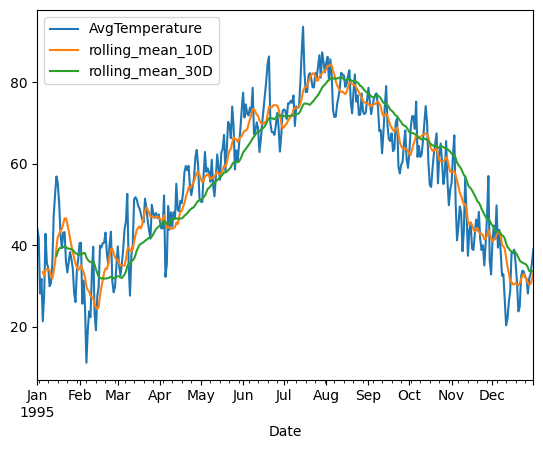

In [226]:
NY[["AvgTemperature","rolling_mean_10D", "rolling_mean_30D"]].loc[NY.index<="1995-12-31"].plot()

## Step 4: Rolling mean temperatures for every city

In [228]:
data["City"].nunique()

154

In [230]:
(data["State"] + data["City"]).nunique()

158

In [231]:
data ["state_city"] = data["State"] + ", " + data["City"]

In [232]:
data

,Region,Country,State,City,AvgTemperature,state_city
Date,,,,,,
1995-01-01,North America,US,Additional Territories,San Juan Puerto Rico,77.4,"Additional Territories, San Juan Puerto Rico"
1995-01-02,North America,US,Additional Territories,San Juan Puerto Rico,78.1,"Additional Territories, San Juan Puerto Rico"
1995-01-03,North America,US,Additional Territories,San Juan Puerto Rico,76.7,"Additional Territories, San Juan Puerto Rico"
1995-01-04,North America,US,Additional Territories,San Juan Puerto Rico,77.7,"Additional Territories, San Juan Puerto Rico"
1995-01-05,North America,US,Additional Territories,San Juan Puerto Rico,77.5,"Additional Territories, San Juan Puerto Rico"
...,...,...,...,...,...,...
2020-05-09,North America,US,Wyoming,Cheyenne,42.3,"Wyoming, Cheyenne"
2020-05-10,North America,US,Wyoming,Cheyenne,43.1,"Wyoming, Cheyenne"
2020-05-11,North America,US,Wyoming,Cheyenne,37.8,"Wyoming, Cheyenne"


In [242]:
us_cities_result = (data
                    .groupby("state_city")
                    .rolling(30, min_periods=15)["AvgTemperature"]
                    .agg(["mean", "max", "min", "std"])
                   )

In [238]:
us_cities_result.reset_index( inplace=True)
us_cities_result

,state_city,Date,mean,max,min,std
0,"Additional Territories, San Juan Puerto Rico",1995-01-01,NaN,NaN,NaN,NaN
1,"Additional Territories, San Juan Puerto Rico",1995-01-02,NaN,NaN,NaN,NaN
2,"Additional Territories, San Juan Puerto Rico",1995-01-03,NaN,NaN,NaN,NaN
3,"Additional Territories, San Juan Puerto Rico",1995-01-04,NaN,NaN,NaN,NaN
4,"Additional Territories, San Juan Puerto Rico",1995-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1455332,"Wyoming, Cheyenne",2020-05-09,44.053333,63.5,16.1,12.096957
1455333,"Wyoming, Cheyenne",2020-05-10,43.823333,63.5,16.1,12.045479
1455334,"Wyoming, Cheyenne",2020-05-11,43.360000,63.5,16.1,11.999299
1455335,"Wyoming, Cheyenne",2020-05-12,43.950000,63.5,16.1,11.447173


<Axes: xlabel='Date'>

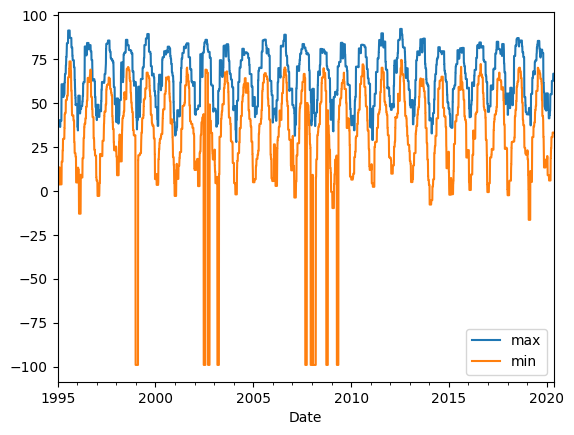

In [241]:
us_cities_result.loc[us_cities_result.state_city == "Illinois, Chicago"].plot(x="Date", y=["max", "min"])

## Step 5: Exponential Moving Average Temperatures for NY & All other cities (ewm)

In [246]:
NY.ewm(alpha=0.2)["AvgTemperature"].mean()

Date
1995-01-01    44.000000
1995-01-02    42.777778
1995-01-03    36.762295
1995-01-04    35.047425
1995-01-05    30.957877
                ...    
2020-05-09    52.842243
2020-05-10    52.333795
2020-05-11    53.007036
2020-05-12    52.625629
2020-05-13    52.460503
Name: AvgTemperature, Length: 9265, dtype: float64

In [247]:
NY.ewm(alpha=0.2, adjust=False)["AvgTemperature"].mean()

Date
1995-01-01    44.000000
1995-01-02    43.560000
1995-01-03    40.468000
1995-01-04    38.714400
1995-01-05    35.231520
                ...    
2020-05-09    52.842243
2020-05-10    52.333795
2020-05-11    53.007036
2020-05-12    52.625629
2020-05-13    52.460503
Name: AvgTemperature, Length: 9265, dtype: float64